# **Seminário - Processamento de Linguagem Natural - 2024.2**

## **Dados Sintéticos**


---
**Título do artigo:** Synthetic Data using LangChain and OpenAI: The Ingenious Shortcut to Data Science’s Success

**Alunos:**


*   Gustavo Bauer Nogueira
*   Leonardo Severgnine Maioli
*   Thiago Alexandre Paiares e Silva


---

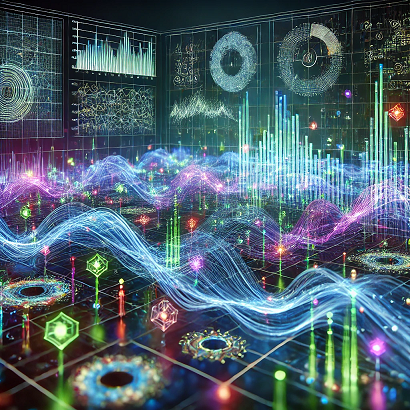

## **Introdução**
---

O artigo selecionado pelo grupo aborda sobre o tema de dados sintéticos, que são dados gerados artificialmente e imitam as propriedades estatísticas e características de dados reais. Os dados sintéticos podem ser gerados por meio de IA generativa e são empregados em diversos setores e indústrias, com destaque para cenários onde a obtenção de dados reais é limitada por questões de privacidade, custo, ou acessibilidade.

Para demonstrar a importância dos dados sintéticos em uma situação real, a autora utilizou a biblioteca LangChain e um modelo da OpenAI para fornecer um exemplo de geração de dados sintéticos que incluem detalhes típicos de transações de e-Commerce fraudulentas, como grandes valores de transação ou endereços IP suspeitos. O conjunto de dados sintéticos gerado pode ser empregado no desenvolvimento e teste de modelos de machine learning para detecção de fraudes em transações de e-commerce.



## **Código do artigo**
---

### **Instalação das bibliotecas necessárias**
---
*   **langchain:** biblioteca que facilita a criação de aplicativos baseados em LLMs, permitindo fluxos de trabalho complexos de encadeamento.
*   **langchain_experimental:** é uma extensão do LangChain com funcionalidades experimentais que ainda estão em fase de testes ou desenvolvimento.
*   **langchain-openai:** biblioteca útil para integrações específicas do LangChain com os modelos da OpenAI.

In [ ]:
!pip install --upgrade --quiet  langchain langchain_experimental langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 591.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/1

### **Importação dos módulos específicos**
---
Nessa etapa, importamos os módulos específicos que vamos utilizar:

*   **FewShotPromptTemplate:** classe usada para criar templates de prompts que são úteis para fornecer ao modelo alguns exemplos de como ele deve gerar uma resposta.
*   **PromptTemplate:** classe que permite a criação de templates de prompts para modelos de linguagem, facilitando a criação de prompts personalizados com placeholders que podem ser preenchidos dinamicamente.
*   **BaseModel:** classe base do Pydantic, que valida e manipula dados estruturados, como JSON.
*   **OPENAI_TEMPLATE:** template pré-definido para criar prompts ou estruturas de dados sintéticos usando os modelos da OpenAI.
*   **create_openai_data_generator:** função que cria um gerador de dados sintéticos utilizando modelos da OpenAI.
*   **SYNTHETIC_FEW_SHOT_PREFIX e SYNTHETIC_FEW_SHOT_SUFFIX:** templates de texto usados para criar prompts de few-shot learning específicos para a geração de dados sintéticos.
*   **ChatOpenAI:** classe que facilita a interação com os modelos de chat da OpenAI.


In [ ]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_experimental.tabular_synthetic_data.openai import (
    OPENAI_TEMPLATE,
    create_openai_data_generator,
)
from langchain_experimental.tabular_synthetic_data.prompts import (
    SYNTHETIC_FEW_SHOT_PREFIX,
    SYNTHETIC_FEW_SHOT_SUFFIX,
)
from langchain_openai import ChatOpenAI

### **Definindo a chave da API da OpenAI**
---



In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


### **Classe modelo para representação de uma transação**
---
*   **TransactionRecord:** classe para representação de uma transação. Com esse esquema, vamos conseguir informar ao nosso gerador de dados sintéticos sobre a forma e a natureza dos dados que esperamos.
  *   Herda BaseModel importada anteriormente.
  *   Possui atributos que correspondem aos campos de uma transação.
  *   Possui uma função que retorna um dicionário Python contendo todos os atributos da instância da classe TransactionRecord atual.


In [ ]:
class TransactionRecord(BaseModel):
    transaction_id: str = Field(
        ..., description="A unique identifier for each transaction. UUID format"
        )
    customer_id: str = Field(
        ..., description="A unique identifier for each customer"
        )
    transaction_amount: float = Field(
        ..., description="The total amount of money exchanged in the transaction."
        )
    transaction_date: str = Field(
        ..., description="The date and time when the transaction took place. Format: mm/dd/yyyy hh:mm"
        )
    payment_method: str = Field(
        ..., description="The method used to complete the transaction (e.g., credit card, PayPal, etc.)."
        )
    product_category: str = Field(
        ..., description="The category of the product involved in the transaction."
        )
    quantity: int = Field(
        ..., description="The number of products involved in the transaction"
        )
    customer_age: int = Field(
        ..., description="The age of the customer making the transaction."
        )
    customer_location: str = Field(
        ..., description="The geographical location of the customer."
        )
    device_used: str = Field(
        ..., description="The type of device used to make the transaction"
        )
    ip_address: str = Field(
        ..., description="The IP address of the device used for the transaction."
        )
    shipping_address: str = Field(
        ..., description="The address where the product was shipped."
        )
    billing_address: str = Field(
        ..., description="The address associated with the payment method."
        )
    is_fraudulent: int = Field(
        ..., description="A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate)"
        )
    account_age_days: int = Field(
        ..., description="The age of the customer’s account in days at the time of the transaction"
        )
    transaction_hour: int = Field(
        ..., description="The hour of the day when the transaction occurred"
        )

    #Trecho adicional para obter dicionário com os atributos da instância da classe
    def to_dict(self):
        return self.dict()

### **Exemplos reais para direcionar o gerador de dados sintéticos**
---

É muito útil passar alguns exemplos de resultados que esperamos para o gerador de dados sintéticos. Nessa etapa, foram criados 4 exemplos:


In [ ]:
examples = [
    {"example": """transaction_id: 44e09e24-74b9-4041-9894-8734ad525faa, customer_id: 37905, transaction_amount: 10.01, transaction_date: 10/01/2024 20:08, payment_method: debit card, product_category: home & garden, quantity: 4, customer_age: 37, customer_location: Christopherland, device_used: desktop, ip_address: 211.189.218.190, shipping_address: 471 Mary Courts Apt. 872\nMaryhaven, KS 16126, billing_address: 471 Mary Courts Apt. 872\nMaryhaven, KS 16126, is_fraudulent: 0, account_age_days: 30, transaction_hour: 20"""},
    {"example": """transaction_id: aa81b9ff-034d-4d8e-bec6-ed29b8ae5d54, customer_id: 75221, transaction_amount: 2458.23, transaction_date: 11/02/2024 03:41, payment_method: bitcoin, product_category: clothing, quantity: 2, customer_age: 21, customer_location: Marymouth, device_used: mobile, ip_address: 126.224.150.175, shipping_address: Unit 5864 Box 9572\nDPO AE 69746, billing_address: 161 Ocean Boulevard Apt. 9572\nDPO AE 69746, is_fraudulent: 1, account_age_days: 2, transaction_hour: 03"""},
    {"example": """transaction_id: 7ac1febd-3e94-457e-bfe4-acf081dc8da0, customer_id: 72145, transaction_amount: 68.20, transaction_date: 07/01/2024 15:41, payment_method: PayPal, product_category: electronics, quantity: 1, customer_age: 43, customer_location: Paynefurt, device_used: tablet, ip_address: 195.31.145.184, shipping_address: 6863 Bryant Points Suite 057\nGuzmanfort, ME 02932, billing_address: 139 Lopez Neck\nCarterview, DE 85571, is_fraudulent: 1, account_age_days: 15, transaction_hour: 15"""},
    {"example": """transaction_id: f2a4d1f8-de6b-4af8-9cb6-ae3f9e098b69, customer_id: 12247, transaction_amount: 132.30, transaction_date: 12/08/2024 16:54, payment_method: bank transfer, product_category: watches, quantity: 1, customer_age: 32, customer_location: New York, device_used: laptop, ip_address: 190.34.122.112, shipping_address: 161 Shiny Courts Apt. 33\nNew York, NY 14453, billing_address: 161 Shiny Courts Apt. 33\nNew York, NY 14453, is_fraudulent: 0, account_age_days: 131, transaction_hour: 16"""}
]

### **Criação do prompt para guiar o modelo**
---

Nessa etapa, é feita a criação de um prompt de few-shot learning estruturado que será passado ao modelo. O prompt criado inclui um prefixo, uma lista de exemplos formatados que foi construída anteriormente e um sufixo. Note que o prefixo e sufixo utilizado são específicos para a geração de dados sintéticos.

Além disso, o prompt criado também contém as variáveis de entrada "subject" e "extra" que são espaços reservados que serão preenchidos a seguir. Por fim, também é definido um exemplo de prompt que colocamos junto com a criação do template.

In [ ]:
OPENAI_TEMPLATE = PromptTemplate(input_variables=["example"], template="{example}")

prompt_template = FewShotPromptTemplate(
    prefix=SYNTHETIC_FEW_SHOT_PREFIX,
    examples=examples,
    suffix=SYNTHETIC_FEW_SHOT_SUFFIX,
    input_variables=["subject", "extra"],
    example_prompt=OPENAI_TEMPLATE,
)

### **Criação do gerador de dados sintéticos**
---

Após definirmos os templates que vamos passar para o nosso gerador, podemos criar o gerador de dados sintéticos utilizando um modelo da OpenAI. Para fazer isso, basta utilizarmos a função **create_openai_data_generator** que importamos anteriormente, passando como parâmetros a classe que definimos para representação de uma transação, o modelo da OpenAI utilizado e o modelo de prompt definido.

In [ ]:
synthetic_data_generator = create_openai_data_generator(
    output_schema=TransactionRecord,
    llm=ChatOpenAI(
        model_name="gpt-4o",
        temperature=1
    ),
    prompt=prompt_template,
)

### **Gerando dados sintéticos**
---

Com o gerador de dados sintéticos criado, podemos utilizá-lo de forma simples para gerar os dados sintéticos desejados. Basta chamar o método **generate** do gerador criado e especificar os parâmetros **subject**, **extra** e **runs** que possuem o assunto/contexto dos dados a serem gerados, informações adicionais para o modelo incluir nos dados gerados e a quantidade de vezes que o gerador realizará o processo de geração respectivamente.

In [ ]:
synthetic_results = synthetic_data_generator.generate(
    subject="TransactionRecord",
    extra = ("Include details typical of fraudulent e-commerce transactions, such as high transaction amounts (e.g., between $500 and $30,000) or suspicious IP addresses. ",
    "Use different payment methods and products that can be purchased online. Ensure the transaction amounts are realistic for online purchases, avoiding extreme values. ",
    "The billing address may or may not be the same as the shipping address."),
    runs=15,
)

### **Visualização dos resultados**

---

Para visualizar os dados sintéticos gerados, podemos utilizar a bilioteca pandas do Python para gerar um dataframe desses dados.

In [ ]:
import pandas as pd
data = [x.to_dict() for x in synthetic_results]
df = pd.DataFrame(data)

In [ ]:
df

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,ip_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,d9a12b28-3a7b-4037-b84c-197d885f5f7a,85372,759.99,09/15/2024 02:34,credit card,electronics,1,29,Littletown,mobile,203.45.167.134,"123 Maple Street Apt. 456\nLittletown, CA 90210","789 Oak Street Suite 012\nLittletown, CA 90210",1,7,2
1,99a6e2c8-0612-4069-b1d5-df076d4505cf,35891,1520.75,03/22/2024 14:30,credit card,furniture,1,37,Springfield,desktop,192.168.1.1,"123 Elm Street Apt. 5A\nSpringfield, IL 62701","456 Oak Street Apt. 2B\nSpringfield, IL 62701",1,3,14
2,bc1234f9-9d4a-4f5b-b3db-8c73700c9f37,54902,2599.99,10/08/2024 11:23,credit card,jewelry,1,41,Franklin,mobile,103.25.17.188,"789 Pine Street Suite 65\nFranklin, TN 37064","456 Birch Street Apt. 12\nFranklin, TN 37064",1,12,11
3,a1b2c3d4-e5f6-7d8a-9b0c-d1e2f3a4b5c6,12345,899.99,05/22/2024 15:45,credit card,electronics,1,28,Brooklyn,mobile,182.123.45.67,"456 Maple Avenue Apt. 3B\nBrooklyn, NY 11201","456 Maple Avenue Apt. 3B\nBrooklyn, NY 11201",1,10,15
4,abcd1234-5678-90ef-ghij-1234567890ab,67890,1250.49,11/02/2024 13:15,cryptocurrency,luxury goods,1,36,Metropolis,tablet,101.15.37.49,"123 Luxury Avenue Apt. 9B\nMetropolis, MT 12345","987 Wealth Road Suite 16\nMetropolis, MT 12345",1,5,13
5,4f2c5fb2-35c3-4d6b-bcf8-a2c5d17d3e70,87912,3120.50,11/11/2024 10:45,credit card,electronics,1,42,Gotham,desktop,172.16.254.1,"200 Wayne Street Apt. 7A\nGotham, NJ 07450","899 Pennyworth Lane Apt. 5B\nGotham, NJ 07450",1,7,10
6,76a10b69-840d-4010-ae30-fe8b5e78e65b,42897,7530.89,09/18/2024 09:45,cryptocurrency,luxury goods,1,39,Star City,laptop,198.51.100.2,"25 Queen Lane Apt. 11A\nStar City, CA 90210","786 King Boulevard Suite 21\nStar City, CA 90211",1,3,9
7,a0a1a2a3-a4a5-a6a7-a8a9-aaabacadaeaf,24680,1543.76,12/15/2024 07:30,PayPal,luxury goods,1,30,Central City,mobile,203.0.113.199,"123 Fast Track Apt. 5C Central City, FL 33010","123 Fast Track Apt. 5C Central City, FL 33010",1,4,7
8,d5a2b3e7-8f50-4b37-82d8-81788498c1d3,55432,8700.65,10/10/2024 14:30,cryptocurrency,luxury goods,1,34,Metropolis,desktop,203.0.113.17,"901 Rich Lane Apt. 3C Metropolis, MT 12345","901 Rich Lane Apt. 3C Metropolis, MT 12345",1,2,14
9,594fcc81-2c3d-45de-a6ee-dae8347c185d,32145,8575.99,08/22/2024 16:55,cryptocurrency,luxury goods,1,28,Bludhaven,laptop,203.0.113.45,"456 Nightwing Avenue Apt. 9D Bludhaven, NY 11235","122 Shadow Lane Apt. 4E Bludhaven, NY 11236",1,5,16


### **Validação dos resultados**

---

É importante que haja supervisão humana para a geração dos dados sintéticos, de forma a garantir a sua usabilidade e conformidade com os dados reais. Para facilitar esse processo, é possível realizar uma validação simples de alguns campos e, em caso de inconsistências, solicitar ao modelo que gere novamente a quantidade de dados inúteis. No entanto, para inconsistências mais complexas, será necessário refinar o prompt e/ou fornecer mais exemplos.

Nessa etapa, definimos as expressões regulares para o ID (formato UUID) e do IP.

In [ ]:
uuid = r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}'
ip_regex = r'^((25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)$'

Definiremos algumas funções úteis para verificar se os dados gerados pelo LLM se adequam aos formatos esperados, retornando `True` em caso positivo e `False` em caso negativo.

  

*   As datas e horários gerados estão no formato mm/dd/yyyy hh:mm.
*   Uma idade válida para um ser humano deve ser maior que zero e menor que 130 anos.
*   Se a transação é fraudulenta, o campo `is_fraudulent` vale 1; se não é, vale 0. Ou seja, é binário e qualquer valor diferente invalida o campo.
*   O tempo de criação das contas não pode ser negativo.
*   A hora em que a compra foi realizada não pode ser menor que zero ou maior que 23, devido ao formato de horário utilizado.


In [ ]:
from datetime import datetime

def is_valid_datetime(datetime_str):
    try:
        datetime.strptime(datetime_str, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

def is_valid_customer_age(customer_age):
    if customer_age < 0 or customer_age > 130:
        return False
    return True

def is_valid_is_fraudulent(is_fraudulent):
    if is_fraudulent != 0 and is_fraudulent != 1:
        return False
    return True

def is_valid_account_age_days(account_age_days):
    if account_age_days < 0:
        return False
    return True

def is_valid_transaction_hour(transaction_hour):
    if transaction_hour < 0 or transaction_hour > 23:
      return False
    return True

Criamos uma lista com a quantidade de elementos equivalente à quantidade de linhas do DataFrame, sendo todos os elementos iguais: o valor booleano `True`.

Em seguida, criamos várias listas (todas com elementos booleanos) contendo `True` ou `False`, dependendo das verificações realizadas. As verificações aplicam as funções criadas anteriormente e também verificamos se os formatos de ID e IP estão na forma das expressões regulares respectivas.

Nessa etapa, por exemplo, se um elemento de ID da linha 0 do DataFrame não estiver no formato esperado (UUID), o elemento de índice 0 da lista `verif_transaction_id` será `False`.

In [ ]:
lista = [True]*len(df)

verif_transaction_id = df['transaction_id'].str.match(uuid).tolist()
verif_transaction_date = [is_valid_datetime(valor) for valor in df['transaction_date']]
verif_customer_age = [is_valid_customer_age(valor) for valor in df['customer_age']]
verif_ip_address = df['ip_address'].str.match(ip_regex).tolist()
verif_is_fraudulent = [is_valid_is_fraudulent(valor) for valor in df['is_fraudulent']]
verif_account_age_days = [is_valid_account_age_days(valor) for valor in df['account_age_days']]
verif_transaction_hour = [is_valid_transaction_hour(valor) for valor in df['transaction_hour']]

Agora, para que um elemento de `lista` de um certo índice permaneça `True`, é necessário que os elementos presentes nesse índice de todas as listas sejam também `True`. Basta que apenas um deles seja `False` para alterar o elemento de mesmo índice de `lista`.

Através dessa etapa, conseguimos definir quais linhas do DataFrame contém dados em desconformidade com o padrão exigido.

In [ ]:
for i in range(len(lista)):
    if not (verif_transaction_id[i] and verif_transaction_date[i] and verif_customer_age[i] and verif_ip_address[i] and verif_is_fraudulent[i] and verif_account_age_days[i] and verif_transaction_hour[i]):
        lista[i] = False

Contamos quantas linhas do DataFrame contêm dados errados e, usando `lista` como máscara, removemos essas linhas e reiniciamos a contagem dos índices.

In [ ]:
numero_false = lista.count(False)
df_filtrado = df[lista].reset_index(drop=True)

print(f"Número de linhas com dados errados no Dataframe: {numero_false}")

Número de linhas com dados errados no Dataframe: 0


Com as linhas erradas removidas e sabendo a sua quantidade, podemos gerar novamente, fornecendo os mesmos parâmetros para o LLM, a mesma quantidade de linhas removidas e transformá-las em um novo DataFrame intermediário.

In [ ]:
synthetic_data_generator_2 = create_openai_data_generator(
    output_schema=TransactionRecord,
    llm=ChatOpenAI(
        model_name="gpt-4o",
        temperature=1
    ),
    prompt=prompt_template,
)

In [ ]:
synthetic_results_v2 = synthetic_data_generator_2.generate(
    subject="TransactionRecord",
    extra = ("Include details typical of fraudulent e-commerce transactions, such as high transaction amounts (e.g., between $500 and $30,000) or suspicious IP addresses. ",
    "Use different payment methods and products that can be purchased online. Ensure the transaction amounts are realistic for online purchases, avoiding extreme values. ",
    "The billing address may or may not be the same as the shipping address."),
    runs=numero_false,
)
data_v2 = [x.to_dict() for x in synthetic_results_v2]
df_interm = pd.DataFrame(data_v2)

Agora, basta juntar o DataFrame intermediário com o DataFrame filtrado (sem as linhas erradas).

In [ ]:
df_concatenado = pd.concat([df_filtrado, df_interm], ignore_index=True)
df_concatenado

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,ip_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,d9a12b28-3a7b-4037-b84c-197d885f5f7a,85372,759.99,09/15/2024 02:34,credit card,electronics,1,29,Littletown,mobile,203.45.167.134,"123 Maple Street Apt. 456\nLittletown, CA 90210","789 Oak Street Suite 012\nLittletown, CA 90210",1,7,2
1,99a6e2c8-0612-4069-b1d5-df076d4505cf,35891,1520.75,03/22/2024 14:30,credit card,furniture,1,37,Springfield,desktop,192.168.1.1,"123 Elm Street Apt. 5A\nSpringfield, IL 62701","456 Oak Street Apt. 2B\nSpringfield, IL 62701",1,3,14
2,bc1234f9-9d4a-4f5b-b3db-8c73700c9f37,54902,2599.99,10/08/2024 11:23,credit card,jewelry,1,41,Franklin,mobile,103.25.17.188,"789 Pine Street Suite 65\nFranklin, TN 37064","456 Birch Street Apt. 12\nFranklin, TN 37064",1,12,11
3,a1b2c3d4-e5f6-7d8a-9b0c-d1e2f3a4b5c6,12345,899.99,05/22/2024 15:45,credit card,electronics,1,28,Brooklyn,mobile,182.123.45.67,"456 Maple Avenue Apt. 3B\nBrooklyn, NY 11201","456 Maple Avenue Apt. 3B\nBrooklyn, NY 11201",1,10,15
4,abcd1234-5678-90ef-ghij-1234567890ab,67890,1250.49,11/02/2024 13:15,cryptocurrency,luxury goods,1,36,Metropolis,tablet,101.15.37.49,"123 Luxury Avenue Apt. 9B\nMetropolis, MT 12345","987 Wealth Road Suite 16\nMetropolis, MT 12345",1,5,13
5,4f2c5fb2-35c3-4d6b-bcf8-a2c5d17d3e70,87912,3120.50,11/11/2024 10:45,credit card,electronics,1,42,Gotham,desktop,172.16.254.1,"200 Wayne Street Apt. 7A\nGotham, NJ 07450","899 Pennyworth Lane Apt. 5B\nGotham, NJ 07450",1,7,10
6,76a10b69-840d-4010-ae30-fe8b5e78e65b,42897,7530.89,09/18/2024 09:45,cryptocurrency,luxury goods,1,39,Star City,laptop,198.51.100.2,"25 Queen Lane Apt. 11A\nStar City, CA 90210","786 King Boulevard Suite 21\nStar City, CA 90211",1,3,9
7,a0a1a2a3-a4a5-a6a7-a8a9-aaabacadaeaf,24680,1543.76,12/15/2024 07:30,PayPal,luxury goods,1,30,Central City,mobile,203.0.113.199,"123 Fast Track Apt. 5C Central City, FL 33010","123 Fast Track Apt. 5C Central City, FL 33010",1,4,7
8,d5a2b3e7-8f50-4b37-82d8-81788498c1d3,55432,8700.65,10/10/2024 14:30,cryptocurrency,luxury goods,1,34,Metropolis,desktop,203.0.113.17,"901 Rich Lane Apt. 3C Metropolis, MT 12345","901 Rich Lane Apt. 3C Metropolis, MT 12345",1,2,14
9,594fcc81-2c3d-45de-a6ee-dae8347c185d,32145,8575.99,08/22/2024 16:55,cryptocurrency,luxury goods,1,28,Bludhaven,laptop,203.0.113.45,"456 Nightwing Avenue Apt. 9D Bludhaven, NY 11235","122 Shadow Lane Apt. 4E Bludhaven, NY 11236",1,5,16


Nesse procedimento de recriação de dados, o LLM pode gerar, novamente, dados errados. Para garantir que o DataFrame final contenha apenas dados nos formatos corretos, pode-se colocar esse procedimento dentro de um loop, verificando-se todos os formatos do DataFrame intermediário.

Caso o DataFrame gerado pelo LLM não contenha erros, não haverá alteração. No entanto, para demonstrar que os códigos apresentados efetivamente excluem os erros, geram novos dados e os concatenam com o DataFrame, usaremos um DataFrame gerado anteriormente (salvo como um arquivo .csv) e que contém um erro na última linha.

In [ ]:
df_exemplo = pd.read_csv('dados_sinteticos.csv', index_col=0)
df_exemplo

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,ip_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,d4f95c8e-2df2-4b29-985b-f80bc5dcf3e6,52130,1.250750e+03,10/15/2024 03:15,credit card,luxury goods,3,29,Willingston,mobile,45.32.108.56,"302 Bluebell Lane Apt. 23\nWillingston, OH 43165","302 Bluebell Lane Apt. 23\nWillingston, OH 43165",1,1,3
1,e6b998a2-1f99-4d8d-a10d-4378ba5e58a0,83764,8.720500e+03,10/25/2024 18:22,credit card,electronics,5,30,Thunderbrook,desktop,203.0.113.45,"88 Red Maple Road Suite 902\nThunderbrook, CA ...","88 Red Maple Road Suite 902\nThunderbrook, CA ...",1,6,18
2,b9a3f527-e155-4d1e-83f5-5bdfebc11a2c,54321,1.100099e+04,11/10/2024 21:35,credit card,jewelry,2,39,Los Angeles,desktop,192.0.2.123,"1234 Sunset Boulevard Apt. 88\nLos Angeles, CA...","1234 Sunset Boulevard Apt. 88\nLos Angeles, CA...",1,2,21
3,29c4e309-b2fc-4f8f-883c-f3e2f7562f6a,78532,1.548099e+04,01/03/2024 14:45,credit card,luxury goods,4,27,Miami,smartphone,198.51.100.45,"456 Paradise Road Miami, FL 33101","456 Paradise Road Miami, FL 33101",1,3,14
4,69c4b8d2-c5b1-4a26-bd90-9c3f7b0ef883,89234,1.599999e+04,10/28/2024 16:10,credit card,luxury goods,5,31,Lakeview,tablet,203.0.113.21,"100 Golden Avenue Suite 44\nLakeview, NY 11550","100 Golden Avenue Suite 44\nLakeview, NY 11550",1,2,16
5,f42f0cdf-b0e7-4630-9495-46b3062d9307,98765,2.049999e+04,12/05/2024 23:12,credit card,luxury jewelry,3,45,New York,mobile,203.0.113.5,"789 Fancy Street Apt. 123\nNew York, NY 10001","789 Fancy Street Apt. 123\nNew York, NY 10001",1,1,23
6,a2f1b5e8-3f54-4f1f-ad87-8146abed2c1e,67240,2.500000e+04,11/15/2023 19:43,credit card,electronics,6,29,Seattle,desktop,192.0.2.145,"456 Tech Street Suite 200\nSeattle, WA 98101","456 Tech Street Suite 200\nSeattle, WA 98101",1,0,19
7,b14c82a9-edf7-411a-bbce-69c54eecf2d7,91327,4.500000e+04,03/15/2024 22:30,credit card,luxury electronics,5,38,Los Angeles,laptop,192.0.2.67,"789 Sunset Boulevard Los Angeles, CA 90001","789 Sunset Boulevard Los Angeles, CA 90001",1,2,22
8,e62b8a0f-8e9f-492b-bde0-dca34bb09bfc,75684,1.989999e+04,12/20/2024 18:45,credit card,luxury watches,2,34,Miami,mobile,192.0.2.50,"123 Ocean Drive Unit 5D\nMiami, FL 33139","123 Ocean Drive Unit 5D\nMiami, FL 33139",1,1,18
9,d41fdc5a-29f7-4771-b5b0-09e7b4e4c7ce,65432,1.500000e+05,10/10/2024 14:30,credit card,luxury cars,1,50,Chicago,mobile,198.51.100.15,"456 Luxury Lane\nChicago, IL 60614","456 Luxury Lane\nChicago, IL 60614",1,1,14


Aplicaremos o mesmo procedimento nesse DataFrame. Todos os códigos são os mesmos apresentados anteriormente na seção **Validação dos resultados**, apenas aplicados ao `df_exemplo` carregado por upload.

In [ ]:
lista_exemplo = [True]*len(df_exemplo)

verif_transaction_id_exemplo = df_exemplo['transaction_id'].str.match(uuid).tolist()
verif_transaction_date_exemplo = [is_valid_datetime(valor) for valor in df_exemplo['transaction_date']]
verif_customer_age_exemplo = [is_valid_customer_age(valor) for valor in df_exemplo['customer_age']]
verif_ip_address_exemplo = df_exemplo['ip_address'].str.match(ip_regex).tolist()
verif_is_fraudulent_exemplo = [is_valid_is_fraudulent(valor) for valor in df_exemplo['is_fraudulent']]
verif_account_age_days_exemplo = [is_valid_account_age_days(valor) for valor in df_exemplo['account_age_days']]
verif_transaction_hour_exemplo = [is_valid_transaction_hour(valor) for valor in df_exemplo['transaction_hour']]

In [ ]:
for i in range(len(lista_exemplo)):
    if not (verif_transaction_id_exemplo[i] and verif_transaction_date_exemplo[i] and verif_customer_age_exemplo[i] and verif_ip_address_exemplo[i] and verif_is_fraudulent_exemplo[i] and verif_account_age_days_exemplo[i] and verif_transaction_hour_exemplo[i]):
        lista_exemplo[i] = False

In [ ]:
numero_false_exemplo = lista_exemplo.count(False)
df_filtrado_exemplo = df_exemplo[lista_exemplo].reset_index(drop=True)

print(f"Número de linhas com dados errados no Dataframe: {numero_false_exemplo}")

Número de linhas com dados errados no Dataframe: 1


In [ ]:
synthetic_data_generator_exemplo = create_openai_data_generator(
    output_schema=TransactionRecord,
    llm=ChatOpenAI(
        model_name="gpt-4o",
        temperature=1
    ),
    prompt=prompt_template,
)

In [ ]:
synthetic_results_exemplo = synthetic_data_generator_exemplo.generate(
    subject="TransactionRecord",
    extra = ("Include details typical of fraudulent e-commerce transactions, such as high transaction amounts (e.g., between $500 and $30,000) or suspicious IP addresses. ",
    "Use different payment methods and products that can be purchased online. Ensure the transaction amounts are realistic for online purchases, avoiding extreme values. ",
    "The billing address may or may not be the same as the shipping address."),
    runs=numero_false_exemplo,
)
data_exemplo = [x.to_dict() for x in synthetic_results_exemplo]
df_interm_exemplo = pd.DataFrame(data_exemplo)

In [ ]:
df_concatenado_exemplo = pd.concat([df_filtrado_exemplo, df_interm_exemplo], ignore_index=True)
df_concatenado_exemplo

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,ip_address,shipping_address,billing_address,is_fraudulent,account_age_days,transaction_hour
0,d4f95c8e-2df2-4b29-985b-f80bc5dcf3e6,52130,1.250750e+03,10/15/2024 03:15,credit card,luxury goods,3,29,Willingston,mobile,45.32.108.56,"302 Bluebell Lane Apt. 23\nWillingston, OH 43165","302 Bluebell Lane Apt. 23\nWillingston, OH 43165",1,1,3
1,e6b998a2-1f99-4d8d-a10d-4378ba5e58a0,83764,8.720500e+03,10/25/2024 18:22,credit card,electronics,5,30,Thunderbrook,desktop,203.0.113.45,"88 Red Maple Road Suite 902\nThunderbrook, CA ...","88 Red Maple Road Suite 902\nThunderbrook, CA ...",1,6,18
2,b9a3f527-e155-4d1e-83f5-5bdfebc11a2c,54321,1.100099e+04,11/10/2024 21:35,credit card,jewelry,2,39,Los Angeles,desktop,192.0.2.123,"1234 Sunset Boulevard Apt. 88\nLos Angeles, CA...","1234 Sunset Boulevard Apt. 88\nLos Angeles, CA...",1,2,21
3,29c4e309-b2fc-4f8f-883c-f3e2f7562f6a,78532,1.548099e+04,01/03/2024 14:45,credit card,luxury goods,4,27,Miami,smartphone,198.51.100.45,"456 Paradise Road Miami, FL 33101","456 Paradise Road Miami, FL 33101",1,3,14
4,69c4b8d2-c5b1-4a26-bd90-9c3f7b0ef883,89234,1.599999e+04,10/28/2024 16:10,credit card,luxury goods,5,31,Lakeview,tablet,203.0.113.21,"100 Golden Avenue Suite 44\nLakeview, NY 11550","100 Golden Avenue Suite 44\nLakeview, NY 11550",1,2,16
5,f42f0cdf-b0e7-4630-9495-46b3062d9307,98765,2.049999e+04,12/05/2024 23:12,credit card,luxury jewelry,3,45,New York,mobile,203.0.113.5,"789 Fancy Street Apt. 123\nNew York, NY 10001","789 Fancy Street Apt. 123\nNew York, NY 10001",1,1,23
6,a2f1b5e8-3f54-4f1f-ad87-8146abed2c1e,67240,2.500000e+04,11/15/2023 19:43,credit card,electronics,6,29,Seattle,desktop,192.0.2.145,"456 Tech Street Suite 200\nSeattle, WA 98101","456 Tech Street Suite 200\nSeattle, WA 98101",1,0,19
7,b14c82a9-edf7-411a-bbce-69c54eecf2d7,91327,4.500000e+04,03/15/2024 22:30,credit card,luxury electronics,5,38,Los Angeles,laptop,192.0.2.67,"789 Sunset Boulevard Los Angeles, CA 90001","789 Sunset Boulevard Los Angeles, CA 90001",1,2,22
8,e62b8a0f-8e9f-492b-bde0-dca34bb09bfc,75684,1.989999e+04,12/20/2024 18:45,credit card,luxury watches,2,34,Miami,mobile,192.0.2.50,"123 Ocean Drive Unit 5D\nMiami, FL 33139","123 Ocean Drive Unit 5D\nMiami, FL 33139",1,1,18
9,d41fdc5a-29f7-4771-b5b0-09e7b4e4c7ce,65432,1.500000e+05,10/10/2024 14:30,credit card,luxury cars,1,50,Chicago,mobile,198.51.100.15,"456 Luxury Lane\nChicago, IL 60614","456 Luxury Lane\nChicago, IL 60614",1,1,14


### **Análise dos resultados**
---

Com os dados sintéticos gerados, é possível criar alguns gráficos para análise de características interessantes desses dados. É possível verificar, por exemplo, qual a maior faixa de valor de transação criada, qual a forma de pagamento mais presente, entre outras coisas.

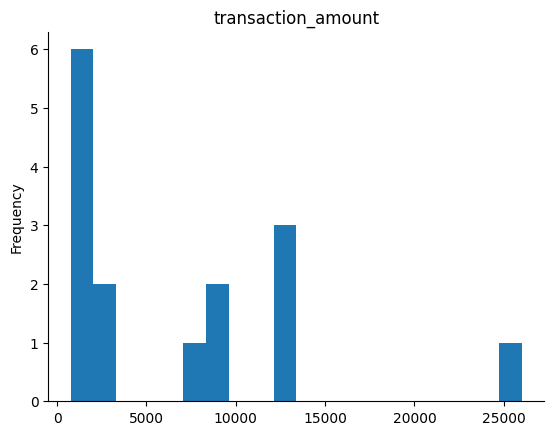

In [ ]:
# @title transaction_amount

from matplotlib import pyplot as plt
df_concatenado['transaction_amount'].plot(kind='hist', bins=20, title='transaction_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

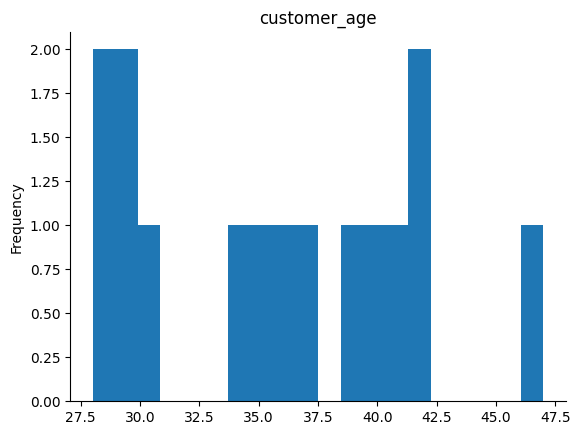

In [ ]:
# @title customer_age

from matplotlib import pyplot as plt
df_concatenado['customer_age'].plot(kind='hist', bins=20, title='customer_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

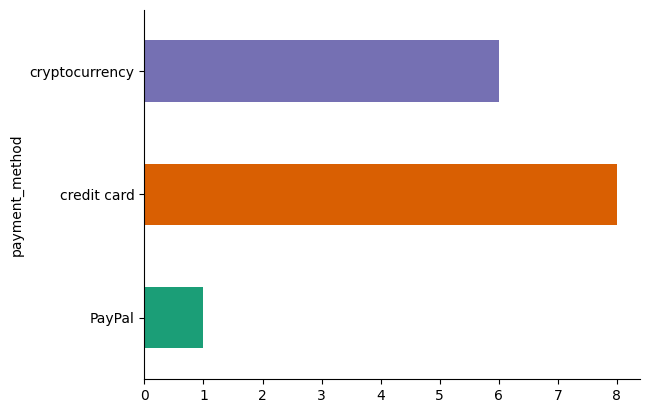

In [ ]:
# @title payment_method

from matplotlib import pyplot as plt
import seaborn as sns
df_concatenado.groupby('payment_method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

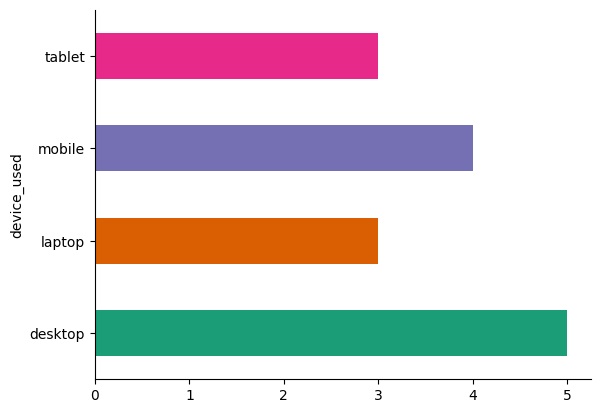

In [ ]:
# @title device_used

from matplotlib import pyplot as plt
import seaborn as sns
df_concatenado.groupby('device_used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

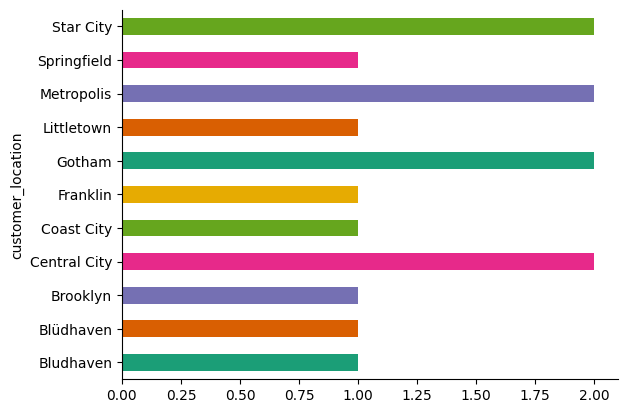

In [ ]:
# @title customer_location

from matplotlib import pyplot as plt
import seaborn as sns
df_concatenado.groupby('customer_location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Referências:**
---
Bubeck, Sébastien. Synthetic Data using LangChain and OpenAI: The Ingenious

1.   JAGTAP, Shriyash. Fraudulent E-Commerce Transactions. A Synthetic Dataset for Fraud Detection and Analysis in E-Commerce Transactions. Disponível em: [https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions](https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions). Acesso em: 28 ago. 2024.
2.   MARTINEZ, Viridiana. Synthetic Data using LangChain and OpenAI: The Ingenious Shortcut to Data Science’s Success. Disponível em: [https://medium.com/@viritaromero/synthetic-data-using-langchain-and-openai-the-ingenious-shortcut-to-data-sciences-success-7dbccfdd3a5e](https://medium.com/@viritaromero/synthetic-data-using-langchain-and-openai-the-ingenious-shortcut-to-data-sciences-success-7dbccfdd3a5e). Acesso em: 28 ago. 2024.

